In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt #General smoothing functions for time series data analysis
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"G:\LILTHOMA\Learn\Internships\Mentoress\Machine Learning Internship MIP-ML-11\Market Price Prediction\MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [11]:
filtered_df=df[df['market']=="ABOHAR(PB)"]

In [12]:
filtered_df.shape

(90, 10)

In [16]:
filtered_df.set_index(pd.to_datetime(filtered_df.date),inplace=True,drop=True)

In [18]:
filtered_df=filtered_df[["quantity","priceMin","priceMax","priceMod"]]
filtered_df

,quantity,priceMin,priceMax,priceMod
date,,,,
2005-01-01,2350,404,493,446
2006-01-01,900,487,638,563
2010-01-01,790,1283,1592,1460
2011-01-01,245,3067,3750,3433
2012-01-01,1035,523,686,605
...,...,...,...,...
2010-12-01,350,2522,3344,3028
2011-12-01,50,500,800,600
2012-12-01,310,880,1565,1270


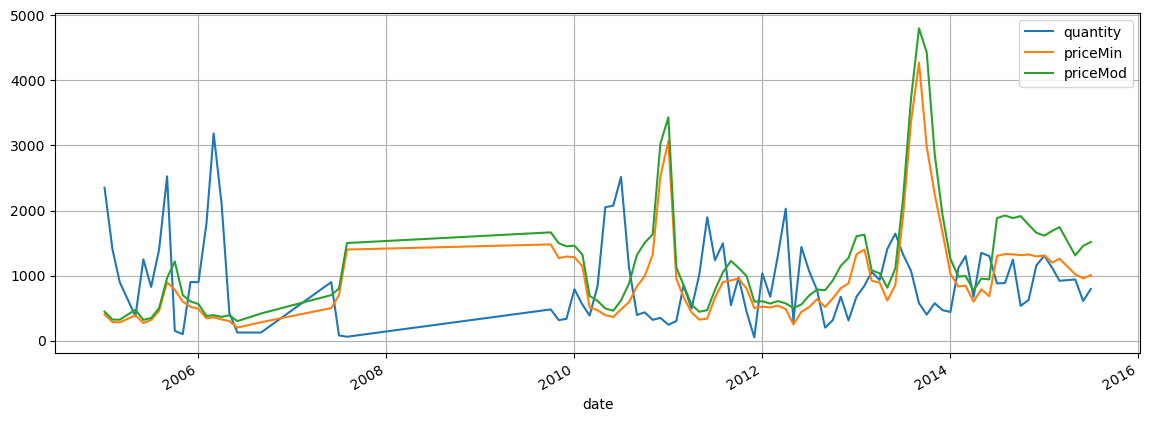

In [22]:
filtered_df[['quantity','priceMin','priceMod']].plot(figsize=(14,5))
plt.grid()

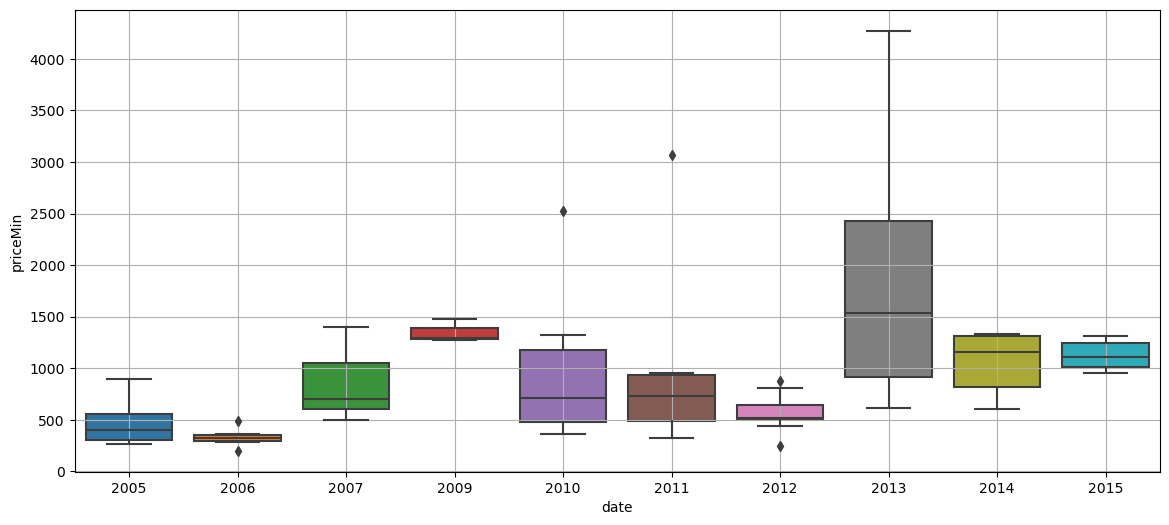

In [28]:
fig,ax=plt.subplots(figsize=(14,6))
sn.boxplot(x=filtered_df.index.year,y=filtered_df['priceMin'],ax=ax)
plt.grid()

from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(14,6))
month_plot(filtered_df['priceMin'],dates=filtered_df.index,ylabel="prices",ax=ax)

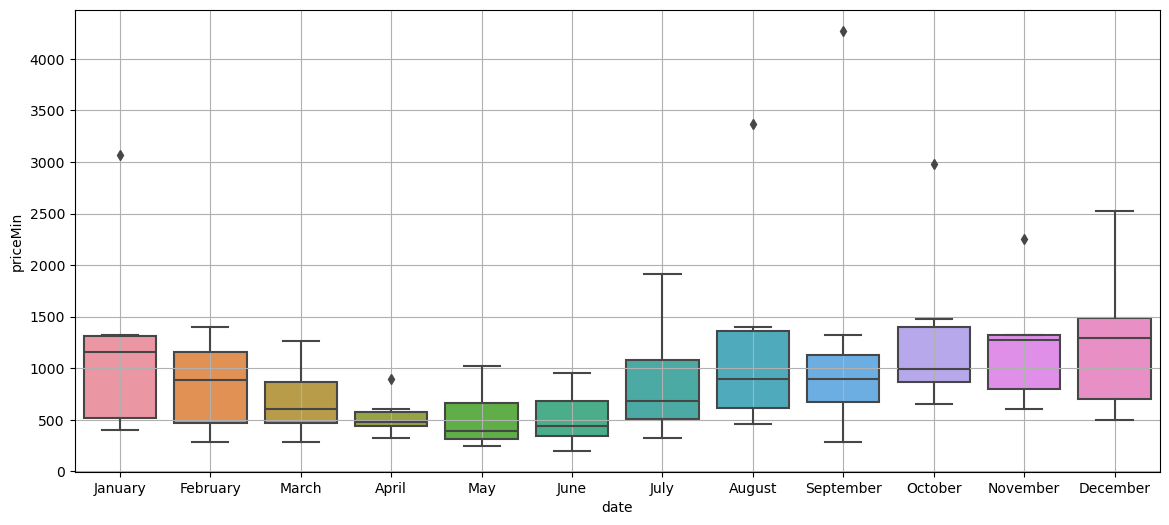

In [43]:
fig,ax=plt.subplots(figsize=(14,6))
sn.boxplot(x=filtered_df.index.month_name(),y=filtered_df['priceMin'],ax=ax)
plt.grid()

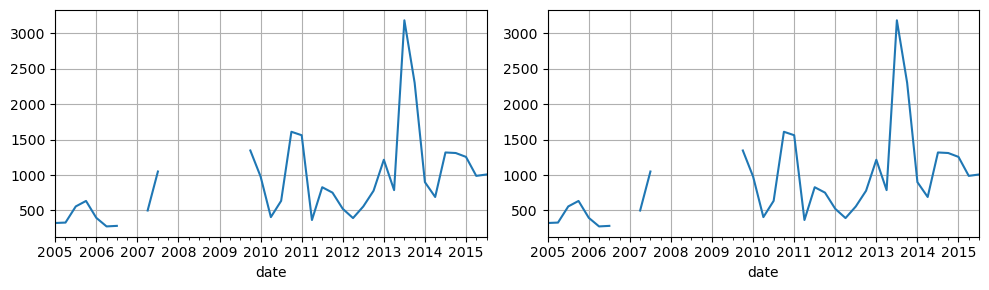

In [53]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
filtered_df.resample("Q").mean()['priceMin'].plot()
plt.grid()
plt.subplot(1,2,2)
filtered_df.resample("QS").mean()['priceMin'].plot()
plt.grid()
plt.tight_layout()

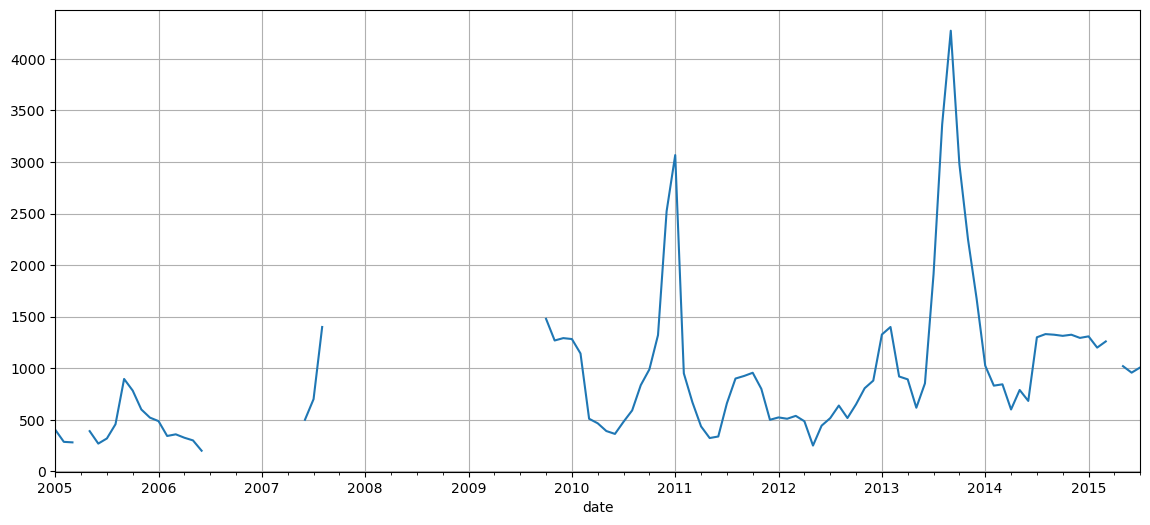

In [45]:
filtered_df.resample("M").mean()['priceMin'].plot(figsize=(14,6))
plt.grid()

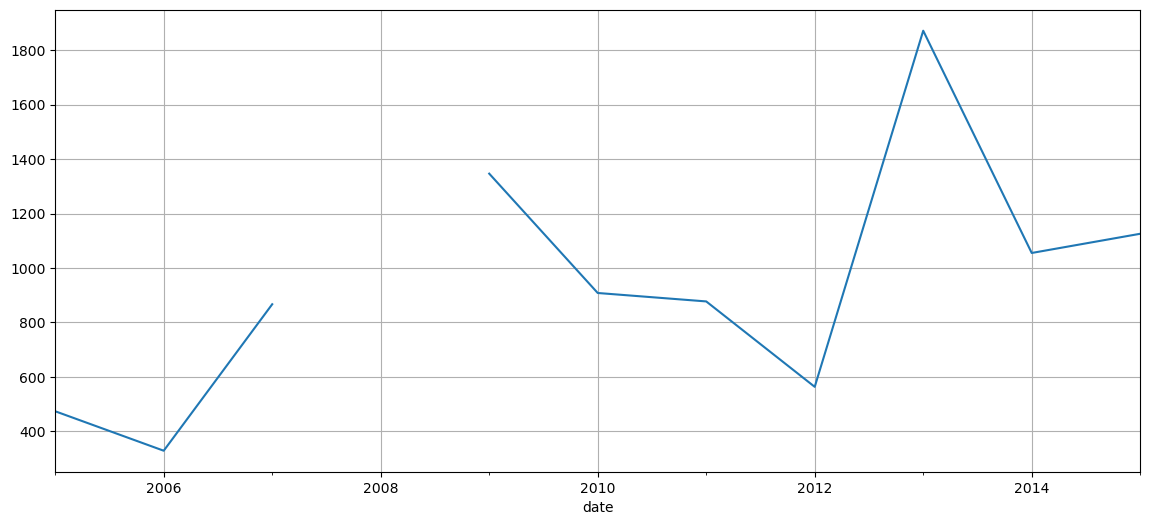

In [47]:
filtered_df.resample("A").mean()['priceMin'].plot(figsize=(14,6))
plt.grid()

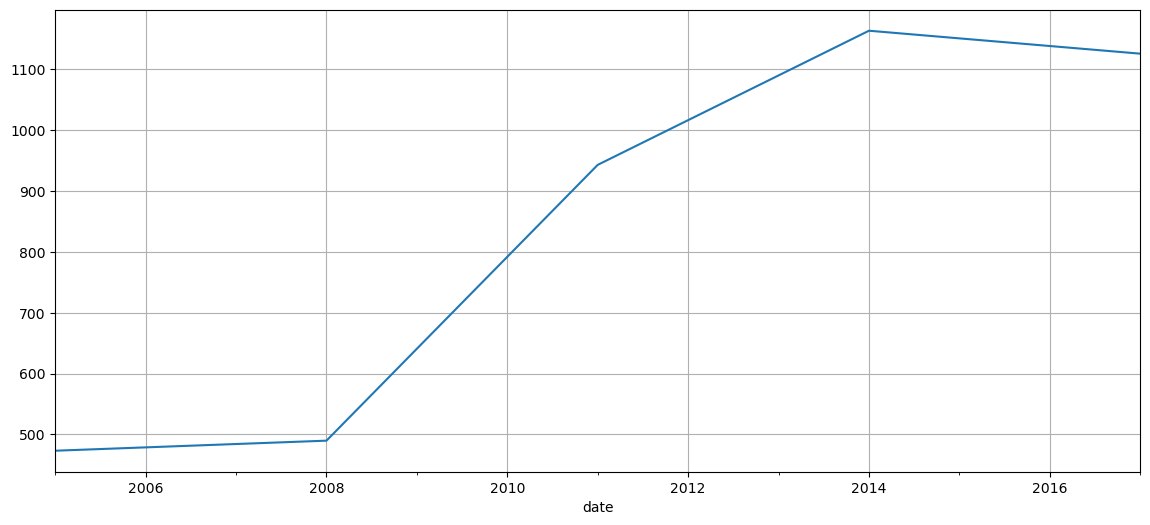

In [59]:
filtered_df.resample("3Y").mean()['priceMin'].plot(figsize=(14,6))
plt.grid()

In [66]:
dd1=filtered_df.groupby(filtered_df.index.year)['priceMin'].mean().reset_index().rename(columns={"priceMin":"mean"})
dd1=dd1.merge(filtered_df.groupby(filtered_df.index.year)['priceMin'].std().reset_index().rename(columns={"priceMin":"std"}),on="date")
dd1['Cov_pct']=((dd1['std']/dd1['mean'])*100).round(2)
dd1

,date,mean,std,Cov_pct
0,2005,473.272727,210.364489,44.45
1,2006,328.285714,87.238589,26.57
2,2007,866.666667,472.581563,54.53
3,2009,1346.666667,115.179570,8.55
4,2010,908.000000,616.740700,67.92
5,2011,877.000000,728.686989,83.09
6,2012,563.083333,165.251576,29.35
7,2013,1871.916667,1144.138696,61.12
8,2014,1055.083333,288.879484,27.38
9,2015,1125.666667,148.755728,13.21


<Axes: xlabel='date'>

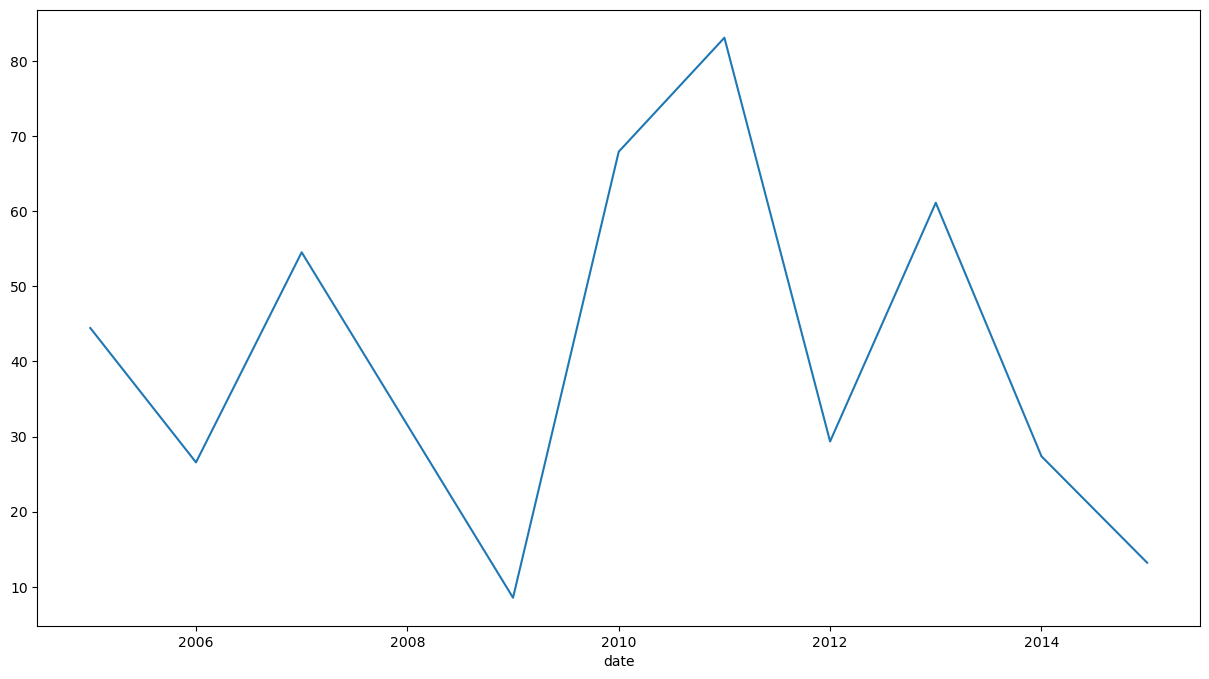

In [68]:
dd1.set_index("date",drop=True,inplace=True)
fig,ax=plt.subplots(figsize=(15,8))
dd1['Cov_pct'].plot()